# 统计分析

pandas本身定位是表格工具,算法不是他的主要目标,所以他内置的算法只是坎坎够用,pandas本身依赖numpy,因此numpy有的统计方法他都有,比如观察他的均值方差标准差什么的,本文依然使用iris来作为源数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
iris_data = pd.read_csv("./source/iris.data",header = None,encoding = "utf-8",
                        names=["sepal_length","sepal_width","petal_length","petal_width","class"])

In [4]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


可以看到各个列的最常见统计学指标

## 相关性

numpy只默认支持协方差矩阵的计算

他们都可以带参数min_periods关键字，该关键字为每个列对指定所需的最小观测值数，以获得有效的结果

+ 协方差矩阵

In [5]:
iris_copy = iris_data.copy()

In [6]:
iris_cov = iris_copy[iris_copy.columns[:-1]].T.cov()

In [7]:
iris_cov[:5]

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,4.750000,4.421667,4.353333,4.160000,4.696667,4.860000,4.215000,4.595000,3.9650,4.493333,...,2.650000,3.090000,2.341667,2.730,2.596667,2.850000,2.741667,2.915000,2.475000,2.600000
1,4.421667,4.149167,4.055000,3.885000,4.358333,4.515000,3.907500,4.284167,3.7075,4.210000,...,2.725000,3.128333,2.409167,2.805,2.661667,2.906667,2.820833,2.955833,2.504167,2.628333
2,4.353333,4.055000,3.990000,3.813333,4.303333,4.453333,3.861667,4.211667,3.6350,4.120000,...,2.446667,2.850000,2.161667,2.520,2.396667,2.630000,2.531667,2.688333,2.281667,2.396667
3,4.160000,3.885000,3.813333,3.656667,4.110000,4.256667,3.688333,4.031667,3.4850,3.953333,...,2.493333,2.856667,2.218333,2.580,2.443333,2.653333,2.571667,2.718333,2.321667,2.440000
4,4.696667,4.358333,4.303333,4.110000,4.650000,4.810000,4.175000,4.541667,3.9150,4.433333,...,2.530000,2.963333,2.238333,2.610,2.483333,2.726667,2.615000,2.798333,2.381667,2.503333


+ 皮尔逊相关度

    这个可以使用numpy来求了

In [8]:
import numpy as np

In [9]:
iris_copy = iris_data.copy()
iris_ = iris_copy[iris_copy.columns[:-1]]

In [10]:
pd.DataFrame(np.corrcoef(iris_.as_matrix()))[:5]

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,1.000000,0.995999,0.999974,0.998168,0.999347,0.999586,0.998811,0.999538,0.998077,0.996552,...,0.597825,0.685581,0.574649,0.584668,0.603048,0.646865,0.605998,0.653473,0.633917,0.633158
1,0.995999,1.000000,0.996607,0.997397,0.992233,0.993592,0.990721,0.997118,0.998546,0.999033,...,0.657750,0.742643,0.632574,0.642756,0.661387,0.705879,0.667114,0.708983,0.686257,0.684835
2,0.999974,0.996607,1.000000,0.998333,0.999061,0.999377,0.998438,0.999605,0.998356,0.996986,...,0.602231,0.689931,0.578798,0.588854,0.607300,0.651305,0.610553,0.657556,0.637631,0.636806
3,0.998168,0.997397,0.998333,1.000000,0.996719,0.997833,0.996139,0.999546,0.999833,0.999307,...,0.641080,0.722377,0.620453,0.629754,0.646729,0.686380,0.647851,0.694538,0.677737,0.677225
4,0.999347,0.992233,0.999061,0.996719,1.000000,0.999883,0.999914,0.998503,0.996031,0.993761,...,0.576858,0.664510,0.555166,0.564947,0.582896,0.625491,0.584183,0.634029,0.616536,0.616138


也可以使用pandas中的corr方法

corr可以使用的算法有:

+ pearson

    (default)皮尔逊相关系数
    
+ kendall

    Kendall Tau相关系数
    
+ spearman

    斯皮尔曼等级相关系数

可以使用'method'关键字指定.请注意，非数字列将从相关性计算中自动排除。为了自己看起来明确,要么写好注释,要么就自己手动排除或者处理

In [11]:
iris_T.corr(method='spearman')[:5]

NameError: name 'iris_T' is not defined

## 其他统计方法


Method|Description
---|---
count()|Number of non-null observations
sum()|Sum of values
mean()|Mean of values
median()|Arithmetic median of values
min()|Minimum
max()|Maximum
std()|Bessel-corrected sample standard deviation
var()|Unbiased variance
skew()|偏度
kurt()|峰度
quantile()|分位数(百分比作为值参数)
apply()|Generic apply

## 窗口函数

对于处理数据，pandas提供了许多窗口函数用于计算公共窗口或滚动统计。
其中包括计数，总和，平均值，中值，相关性，方差，协方差，标准偏差，偏度和峰度。

我们使用`rolling`,`.expanding `,`ewm` 对数据进行相应的处理

这三个函数的用法和groupby很像,
他们的构造函数通常这些方法都有相同的接口。
他们都接受以下参数：

+ window：移动窗口的大小
+ min_periods：要求非空数据点的阈值（否则结果为NA）
+ center：boolean，是否在中间设置标签（默认为False）
+ axis

+ ### rolling函数

`rolling(window,min_periods,center,axis)`

In [12]:
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
s = s.cumsum()
s[:5]

2000-01-01   -1.469066
2000-01-02   -1.493505
2000-01-03   -3.071202
2000-01-04   -2.740711
2000-01-05   -3.336262
Freq: D, dtype: float64

In [13]:
r = s.rolling(window=60)

In [14]:
r

Rolling [window=60,center=False,axis=0]

In [15]:
r.mean()

2000-01-01          NaN
2000-01-02          NaN
2000-01-03          NaN
2000-01-04          NaN
2000-01-05          NaN
2000-01-06          NaN
2000-01-07          NaN
2000-01-08          NaN
2000-01-09          NaN
2000-01-10          NaN
2000-01-11          NaN
2000-01-12          NaN
2000-01-13          NaN
2000-01-14          NaN
2000-01-15          NaN
2000-01-16          NaN
2000-01-17          NaN
2000-01-18          NaN
2000-01-19          NaN
2000-01-20          NaN
2000-01-21          NaN
2000-01-22          NaN
2000-01-23          NaN
2000-01-24          NaN
2000-01-25          NaN
2000-01-26          NaN
2000-01-27          NaN
2000-01-28          NaN
2000-01-29          NaN
2000-01-30          NaN
                ...    
2002-08-28    46.641130
2002-08-29    46.733553
2002-08-30    46.801611
2002-08-31    46.899215
2002-09-01    47.016365
2002-09-02    47.088110
2002-09-03    47.147598
2002-09-04    47.200116
2002-09-05    47.257776
2002-09-06    47.335399
2002-09-07    47

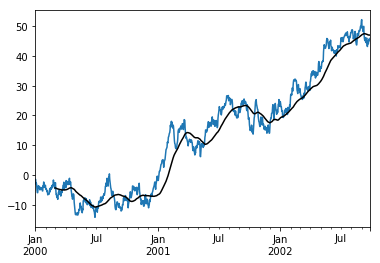

In [16]:
s.plot()
r.mean().plot(style='k')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014687BE3860>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000014687CEC518>], dtype=object)

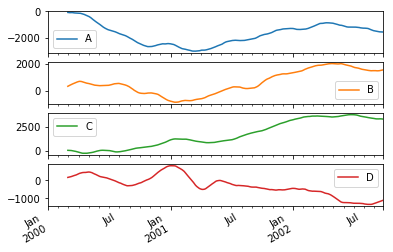

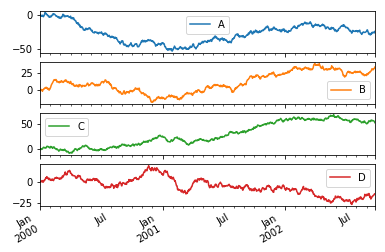

In [17]:
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=pd.date_range('1/1/2000', periods=1000),
                  columns=['A', 'B', 'C', 'D'])

df = df.cumsum()
df.rolling(window=60).sum().plot(subplots=True)
df.plot(subplots=True)

#### 使用自定义的方法 

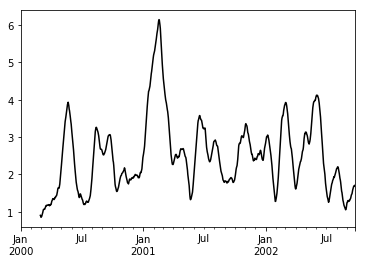

In [18]:
s.rolling(window=60)\
.apply(lambda x: np.fabs(x - x.mean()).mean())\
.plot(style='k')


rolling有一个特有关键字win_type
它表示窗口的类型,
公认类型有:
+ boxcar
+ triang
+ blackman
+ hamming
+ bartlett
+ parzen
+ bohman
+ blackmanharris
+ nuttall
+ barthann
+ kaiser (需要beta参数)
+ gaussian (需要std参数)
+ general_gaussian (需要 power, width参数)
+ slepian (需要width参数).

In [19]:
ser = pd.Series(np.random.randn(10), index=pd.date_range('1/1/2000', periods=10))
ser.rolling(window=5, win_type='triang').mean()

2000-01-01         NaN
2000-01-02         NaN
2000-01-03         NaN
2000-01-04         NaN
2000-01-05    0.241423
2000-01-06    0.554305
2000-01-07    0.879226
2000-01-08    0.802116
2000-01-09    0.600150
2000-01-10    0.049508
Freq: D, dtype: float64

In [20]:
ser.rolling(window=5, win_type='boxcar').mean()

2000-01-01         NaN
2000-01-02         NaN
2000-01-03         NaN
2000-01-04         NaN
2000-01-05    0.430083
2000-01-06    0.543986
2000-01-07    0.612879
2000-01-08    0.790742
2000-01-09    0.600822
2000-01-10   -0.150064
Freq: D, dtype: float64

In [21]:
ser.rolling(window=5, win_type='gaussian').mean(std=0.1)

2000-01-01         NaN
2000-01-02         NaN
2000-01-03         NaN
2000-01-04         NaN
2000-01-05   -0.345494
2000-01-06    0.117715
2000-01-07    2.378884
2000-01-08   -0.026842
2000-01-09    0.940132
2000-01-10    0.543824
Freq: D, dtype: float64

### 时间感知滚动

这对于非规则的时间频率指数特别有用。第一个参数使用字符串表示时间间隔即可

In [22]:
dft = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]},
                   index=pd.date_range('20130101 09:00:00', periods=5, freq='s'))
dft

,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:01,1.0
2013-01-01 09:00:02,2.0
2013-01-01 09:00:03,NaN
2013-01-01 09:00:04,4.0


In [23]:
dft.rolling('2s').sum()

,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:01,1.0
2013-01-01 09:00:02,3.0
2013-01-01 09:00:03,2.0
2013-01-01 09:00:04,4.0


### 计算窗口的cov() 和 corr() 

在金融数据分析和其他领域中，通常对于时间序列的集合计算协方差和相关矩阵。通常，人们也对移动窗协方差和相关矩阵感兴趣。这可以通过传递 pairwise 关键字参数来实现，在DataFrame输入的情况下，将产生一个Panel，其中的 items 是有问题的日期。在单个DataFrame参数的情况下，成对参数甚至可以省略：


In [24]:
df2 = df[:20]

In [25]:
df2.rolling(window=5).corr(df2['B'])

,A,B,C,D
2000-01-01,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,-0.988134,1.0,-0.509080,-0.044348
2000-01-06,-0.971898,1.0,-0.267032,-0.140462
2000-01-07,-0.614334,1.0,-0.248780,-0.932933
2000-01-08,-0.164408,1.0,0.333629,-0.705022
2000-01-09,0.588439,1.0,0.461840,-0.424914
2000-01-10,-0.089130,1.0,0.613644,-0.502755


In [26]:
covs = df[['B','C','D']].rolling(window=50).cov(df[['A','B','C']], pairwise=True)

In [27]:
covs[df.index[-50]]

,A,B,C
B,-5.131780,5.522610,-0.344374
C,1.051719,-0.344374,2.804096
D,1.841796,0.252558,1.139038


In [28]:
correls = df.rolling(window=50).corr()
correls[df.index[-50]]

,A,B,C,D
A,1.000000,-0.617498,0.177600,0.330833
B,-0.617498,1.000000,-0.087511,0.068268
C,0.177600,-0.087511,1.000000,0.432085
D,0.330833,0.068268,0.432085,1.000000


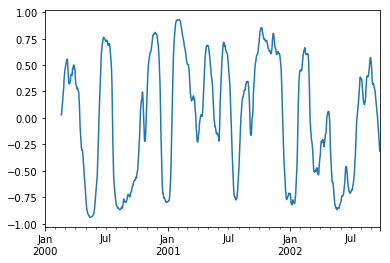

In [29]:
correls.loc[:, 'A', 'C'].plot()

### 使用`aggregate`聚合

这个操作和groupby那个聚合非常类似,构建窗口后通过一系列算法获得了各窗口的值,我们可以通过传递一个函数到整个DataFrame

也可以用`agg()`一次应用多个function

In [30]:
dfa = pd.DataFrame(np.random.randn(1000, 3),
                    index=pd.date_range('1/1/2000', periods=1000),
                    columns=['A', 'B', 'C'])

In [31]:
r = dfa.rolling(window=60,min_periods=1)
r.aggregate(np.sum)[:10]

,A,B,C
2000-01-01,-0.381921,0.197892,-0.387883
2000-01-02,-1.283849,0.631795,-0.984351
2000-01-03,-0.561875,0.727460,-0.631296
2000-01-04,-0.677190,2.377584,-0.764575
2000-01-05,-0.892768,1.747055,-0.672681
2000-01-06,-2.100031,2.234710,-1.314329
2000-01-07,-1.458504,3.485393,-0.673807
2000-01-08,-1.001579,3.055856,-1.339435
2000-01-09,-0.189259,4.399352,-0.788718
2000-01-10,0.603671,4.577256,-0.705698


In [32]:
r['A'].agg([np.sum, np.mean, np.std])[:10]

,sum,mean,std
2000-01-01,-0.381921,-0.381921,NaN
2000-01-02,-1.283849,-0.641925,0.367700
2000-01-03,-0.561875,-0.187292,0.829262
2000-01-04,-0.677190,-0.169298,0.678045
2000-01-05,-0.892768,-0.178554,0.587569
2000-01-06,-2.100031,-0.350005,0.672729
2000-01-07,-1.458504,-0.208358,0.719433
2000-01-08,-1.001579,-0.125197,0.706377
2000-01-09,-0.189259,-0.021029,0.730929
2000-01-10,0.603671,0.060367,0.735628


In [33]:
r['A'].agg({'result1' : np.sum,'result2' : np.mean})[:10]

,result1,result2
2000-01-01,-0.381921,-0.381921
2000-01-02,-1.283849,-0.641925
2000-01-03,-0.561875,-0.187292
2000-01-04,-0.677190,-0.169298
2000-01-05,-0.892768,-0.178554
2000-01-06,-2.100031,-0.350005
2000-01-07,-1.458504,-0.208358
2000-01-08,-1.001579,-0.125197
2000-01-09,-0.189259,-0.021029
2000-01-10,0.603671,0.060367


In [34]:
r.agg([np.sum, np.mean])[:10]

A                   B                   C          
                 sum      mean       sum      mean       sum      mean
2000-01-01 -0.381921 -0.381921  0.197892  0.197892 -0.387883 -0.387883
2000-01-02 -1.283849 -0.641925  0.631795  0.315897 -0.984351 -0.492176
2000-01-03 -0.561875 -0.187292  0.727460  0.242487 -0.631296 -0.210432
2000-01-04 -0.677190 -0.169298  2.377584  0.594396 -0.764575 -0.191144
2000-01-05 -0.892768 -0.178554  1.747055  0.349411 -0.672681 -0.134536
2000-01-06 -2.100031 -0.350005  2.234710  0.372452 -1.314329 -0.219055
2000-01-07 -1.458504 -0.208358  3.485393  0.497913 -0.673807 -0.096258
2000-01-08 -1.001579 -0.125197  3.055856  0.381982 -1.339435 -0.167429
2000-01-09 -0.189259 -0.021029  4.399352  0.488817 -0.788718 -0.087635
2000-01-10  0.603671  0.060367  4.577256  0.457726 -0.705698 -0.070570

+ ### expanding函数

`expanding(window,min_periods,center,axis)`

滚动统计的一个常见替代方法是使用扩展窗口，该窗口产生具有到达该时间点之前可用的所有数据的统计的值。

他的接口接近.rolling的接口，.expanding方法返回一个Expanding对象。我们可以对比下一下两个函数,他们是等效的

In [35]:
df.rolling(window=len(df), min_periods=1).mean()[:5]

,A,B,C,D
2000-01-01,0.229987,-1.887123,0.039168,0.058430
2000-01-02,-0.235200,-1.471578,-0.230086,-0.237068
2000-01-03,-0.784645,-0.965294,-0.766004,-0.240188
2000-01-04,-1.142385,-0.637957,-0.714035,-0.266348
2000-01-05,-1.151739,-0.567396,-0.556405,-0.068604


In [36]:
df.expanding(min_periods=1).mean()[:5]

,A,B,C,D
2000-01-01,0.229987,-1.887123,0.039168,0.058430
2000-01-02,-0.235200,-1.471578,-0.230086,-0.237068
2000-01-03,-0.784645,-0.965294,-0.766004,-0.240188
2000-01-04,-1.142385,-0.637957,-0.714035,-0.266348
2000-01-05,-1.151739,-0.567396,-0.556405,-0.068604


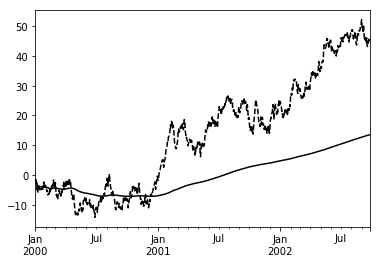

In [37]:
s.plot(style='k--')
s.expanding().mean().plot(style='k')

+ ### 指数加权窗口ewm

ewm是几个上述统计量的指数加权版本。
他支持的默认方法比较少

Function|Description
---|---
mean()|EW moving average
var()|EW moving variance
std()|EW moving standard deviation
corr()|EW moving correlation
cov()|EW moving covariance

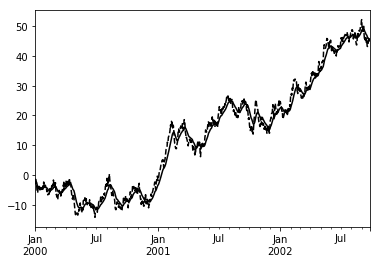

In [38]:
s.plot(style='k--')
s.ewm(span=20).mean().plot(style='k')